# Exemplo de classificação com a base IRIS

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

# from sklearn.cross_validation import train_test_split;
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score

## Lendo a base

In [2]:
iris = datasets.load_iris()
#Transformando em dataframe para facilitar a visualizacao
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Distribuição dos dados da IRIS

Plot dos dados em função de três atributos

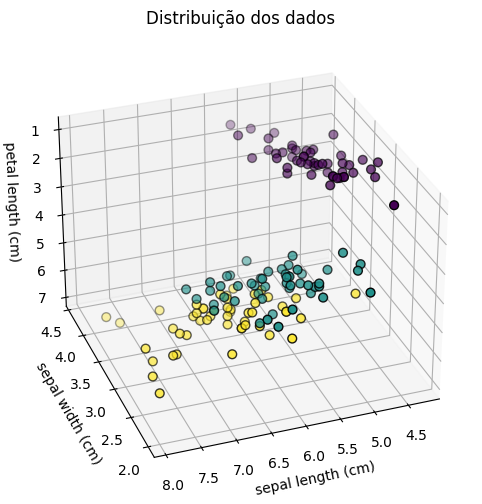

In [3]:
feature_number1 = 0
feature_number2 = 1
feature_number3 = 2

# fig = plt.figure(1, figsize=(8, 6))
fig = plt.figure(figsize=(8, 6))
# ax = Axes3D(fig, elev=-150, azim=110)
ax = plt.axes(projection='3d', elev=-150, azim=110)
ax.scatter(iris_df.iloc[:, feature_number1], 
           iris_df.iloc[:, feature_number2], 
           iris_df.iloc[:, feature_number3], 
           c=iris_df.iloc[:, 4],
           edgecolor='k', s=40)
ax.set_title("Distribuição dos dados")
ax.set_xlabel(iris_df.columns[feature_number1])
ax.set_ylabel(iris_df.columns[feature_number2])
ax.set_zlabel(iris_df.columns[feature_number3])

plt.show()

Plot dos dados em função de dois atributos

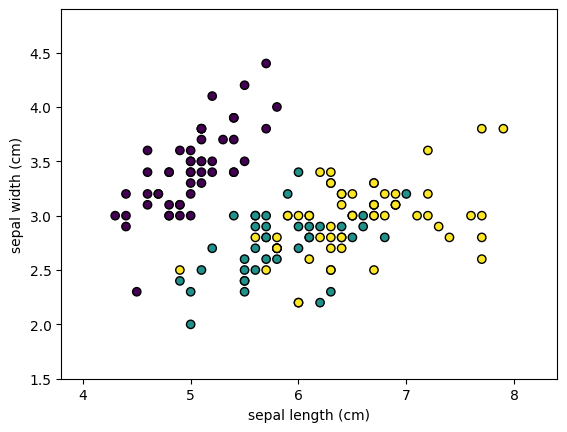

In [4]:
feature_number1 = 0
feature_number2 = 1

plt.scatter(iris_df.iloc[:, feature_number1], 
            iris_df.iloc[:, feature_number2], 
            c=iris_df.iloc[:, 4],
            edgecolor='k')

plt.xlabel(iris.feature_names[feature_number1])
plt.ylabel(iris.feature_names[feature_number2])

plt.xlim(iris_df.iloc[:, feature_number1].min() - 0.5,
         iris_df.iloc[:, feature_number1].max() + 0.5)

plt.ylim(iris_df.iloc[:, feature_number2].min() - 0.5,
         iris_df.iloc[:, feature_number2].max() + 0.5);

## Divisão treino/teste

In [18]:
X = iris_df.iloc[:,0:-1]
Y = iris_df.iloc[:,-1]
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X,Y,test_size=0.3)
#Quantidade de exemplos de cada classe no conjunto de treino
print('Quantidade de exemplos em cada classe no conjunto de treino')
Y_treino.value_counts()

Quantidade de exemplos em cada classe no conjunto de treino


target
0    39
2    38
1    28
Name: count, dtype: int64

In [19]:
print(X_treino.shape)
print(X_teste.shape)

(105, 4)
(45, 4)


## Treinando uma MLP

In [20]:
MLP = MLPClassifier(hidden_layer_sizes = (100,100), max_iter = 1500)
MLP.fit(X_treino,Y_treino)

MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1500)

## Fazendo as predições e calculando a taxa de acerto

In [21]:
valores_preditos_teste = MLP.predict(X_teste)
valores_preditos_treinamento = MLP.predict(X_treino)

acuracia_teste = accuracy_score(Y_teste,
                                valores_preditos_teste)

acuracia_treinamento = accuracy_score(Y_treino,
                                      valores_preditos_treinamento)

kappa_teste = cohen_kappa_score(Y_teste,
                                      valores_preditos_teste)

kappa_treinamento = cohen_kappa_score(Y_treino,
                                      valores_preditos_treinamento)

matriz_confusao_teste = confusion_matrix(Y_teste,
                                         valores_preditos_teste)

print('Acuracia treino = ', acuracia_treinamento)
print('Acuracia teste = ', acuracia_teste)
print('Kappa treino = ', kappa_treinamento)
print('Kappa teste = ', kappa_teste)
print(matriz_confusao_teste)

Acuracia treino =  1.0
Acuracia teste =  0.9333333333333333
Kappa treino =  1.0
Kappa teste =  0.8950233281493002
[[11  0  0]
 [ 0 20  2]
 [ 0  1 11]]


# Exemplo de classificação com a base pima-indians-diabetes

In [44]:
dados = pd.read_csv('pima-indians-diabetes.csv')
dados.head()

,# 1. Number of times pregnant,# 2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test,# 3. Diastolic blood pressure (mm Hg),# 4. Triceps skin fold thickness (mm),# 5. 2-Hour serum insulin (mu U/ml),# 6. Body mass index (weight in kg/(height in m)^2),# 7. Diabetes pedigree function,# 8. Age (years),# 9. Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [45]:
#Contando o número de exemplos de cada classe
dados.iloc[:,-1].value_counts()

# 9. Class variable (0 or 1)
0    500
1    268
Name: count, dtype: int64

In [46]:
X = dados.iloc[:,0:-1]
Y = dados.iloc[:,-1]
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X,Y,
                                        test_size=0.3,stratify=Y)
Y_teste.value_counts()

# 9. Class variable (0 or 1)
0    150
1     81
Name: count, dtype: int64

## Treinando a MLP

In [57]:
MLP = MLPClassifier(hidden_layer_sizes=(100,50, 25, 10),
                    max_iter=5000,shuffle=True)

MLP.fit(X_treino,Y_treino)
Y_predito = MLP.predict(X_teste)
matriz_confusao = confusion_matrix(Y_predito,Y_teste)
acuracia = accuracy_score(Y_predito,Y_teste)
kappa = cohen_kappa_score(Y_predito,Y_teste)

print(matriz_confusao)
print('Acurácia = ', acuracia)
print('Kappa = ', kappa)

[[121  48]
 [ 29  33]]
Acurácia =  0.6666666666666666
Kappa =  0.226282134934099


## Balanceando os dados

In [38]:
X_somente_classe_1 = X_treino.loc[Y_treino == 1,:]
Y_somente_classe_1 = np.ones(X_somente_classe_1.shape[0])

X_treino_balanceado = pd.concat([X_treino,
                                 X_somente_classe_1])
Y_treino_balanceado = pd.concat([Y_treino,
                                 pd.DataFrame(Y_somente_classe_1,
                                              dtype=np.int8)])

In [39]:
Y_treino_balanceado.value_counts()

1    374
0    350
Name: count, dtype: int64

## Treinando novamente o modelo balanceado e o não balanceado

In [43]:
#Não balanceado
MLP = MLPClassifier(hidden_layer_sizes=(1000,100),
                    max_iter=1500,shuffle=True)

MLP.fit(X_treino,Y_treino)
Y_predito = MLP.predict(X_teste)
matriz_confusao = confusion_matrix(Y_predito,Y_teste)
acuracia = accuracy_score(Y_predito,Y_teste)
kappa = cohen_kappa_score(Y_predito,Y_teste)


#Modelo balanceado
MLP_balanceada = MLPClassifier(hidden_layer_sizes=(1000,100),
                               max_iter=1500,shuffle=True)

MLP_balanceada.fit(X_treino_balanceado,Y_treino_balanceado)
Y_predito_balanceada = MLP_balanceada.predict(X_teste)
matriz_confusao_balanceada = confusion_matrix(Y_predito_balanceada,
                                              Y_teste)
acuracia_balanceada = accuracy_score(Y_predito_balanceada,Y_teste)
kappa_balanceada = cohen_kappa_score(Y_predito_balanceada,Y_teste)



#print(matriz_confusao)
print('Acurácia não balanceada = ', acuracia)
print('Acurácia balanceada = ', acuracia_balanceada)
print('\nKappa não balanceada = ', kappa)
print('Kappa balanceada = ', kappa_balanceada)

print('\nMatriz de confusão não balanceada = ')
print(matriz_confusao)
print('\nMatriz de confusão balanceada = ')
print(matriz_confusao_balanceada)

/home/rafael/Documentos/IFPI/2023.2/TOPICOS-ESPECIAIS-PROF/env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Acurácia não balanceada =  0.7012987012987013
Acurácia balanceada =  0.7056277056277056

Kappa não balanceada =  0.23806109278646204
Kappa balanceada =  0.3063063063063063

Matriz de confusão não balanceada = 
[[140  59]
 [ 10  22]]

Matriz de confusão balanceada = 
[[128  46]
 [ 22  35]]
